In [1]:
# Importing the necessary libraries

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error 

In [2]:
df = pd.read_csv('data/steel_data.csv')

In [3]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
df.columns =df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   usage_kwh                             35040 non-null  float64
 2   lagging_current_reactive.power_kvarh  35040 non-null  float64
 3   leading_current_reactive_power_kvarh  35040 non-null  float64
 4   co2(tco2)                             35040 non-null  float64
 5   lagging_current_power_factor          35040 non-null  float64
 6   leading_current_power_factor          35040 non-null  float64
 7   nsm                                   35040 non-null  int64  
 8   weekstatus                            35040 non-null  object 
 9   day_of_week                           35040 non-null  object 
 10  load_type                             35040 non-null  object 
dtypes: float64(6), 

In [5]:
df.describe()

,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [6]:
# Renaming the columns for easier call outs 
df= df.rename(columns={'lagging_current_reactive.power_kvarh':'lagging_kvarh',
                       'leading_current_reactive_power_kvarh':'leading_kvarh',
                       'lagging_current_power_factor':'lagging_pf',
                       'leading_current_power_factor': 'leading_pf', 
                        'day_of_week' : 'day', 
                         'co2(tco2)' : 'co2'}
                       )

In [7]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['month'] =df['date'].dt.month
df['hour'] =df['date'].dt.hour

### EXPLORATORY DATA ANALYSIS

In [9]:
df['co2'].value_counts()

co2
0.00    20990
0.02     4643
0.03     4261
0.04     1834
0.01     1512
0.05     1363
0.06      410
0.07       27
Name: count, dtype: int64

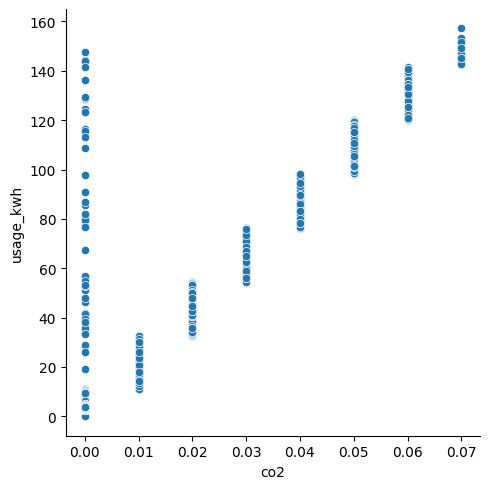

In [23]:
sns.relplot(data=df, x='co2', y='usage_kwh',kind='scatter')
plt.show()

In [10]:
# Since the CO2 value behaves like discrete , it is converted to a category
df['co2'] =df['co2'].astype('category')

In [12]:
#Visualizing theload based on the measure of Month, Day and Hour

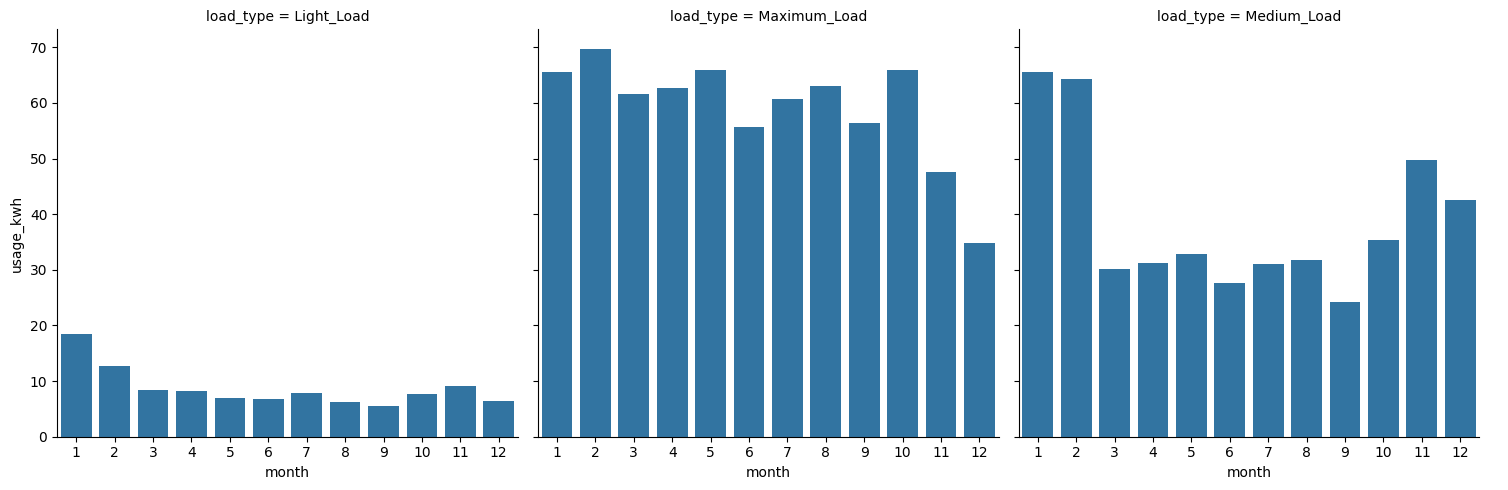

In [13]:
mean_month_kwh=df.groupby(['month','load_type'])['usage_kwh'].mean().reset_index()
sns.catplot(data=mean_month_kwh, x='month', y='usage_kwh', col='load_type', kind='bar')
plt.show()

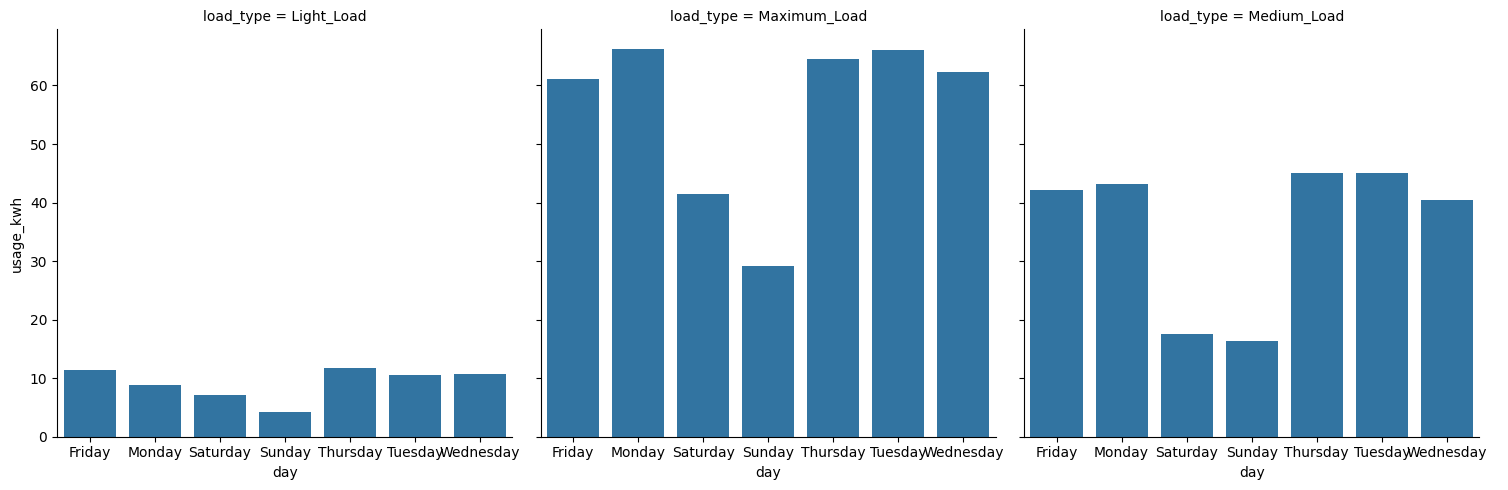

In [14]:
mean_day_kwh=df.groupby(['day','load_type'])['usage_kwh'].mean().reset_index()
sns.catplot(data=mean_day_kwh, x='day', y='usage_kwh', col='load_type', kind='bar')
plt.show()

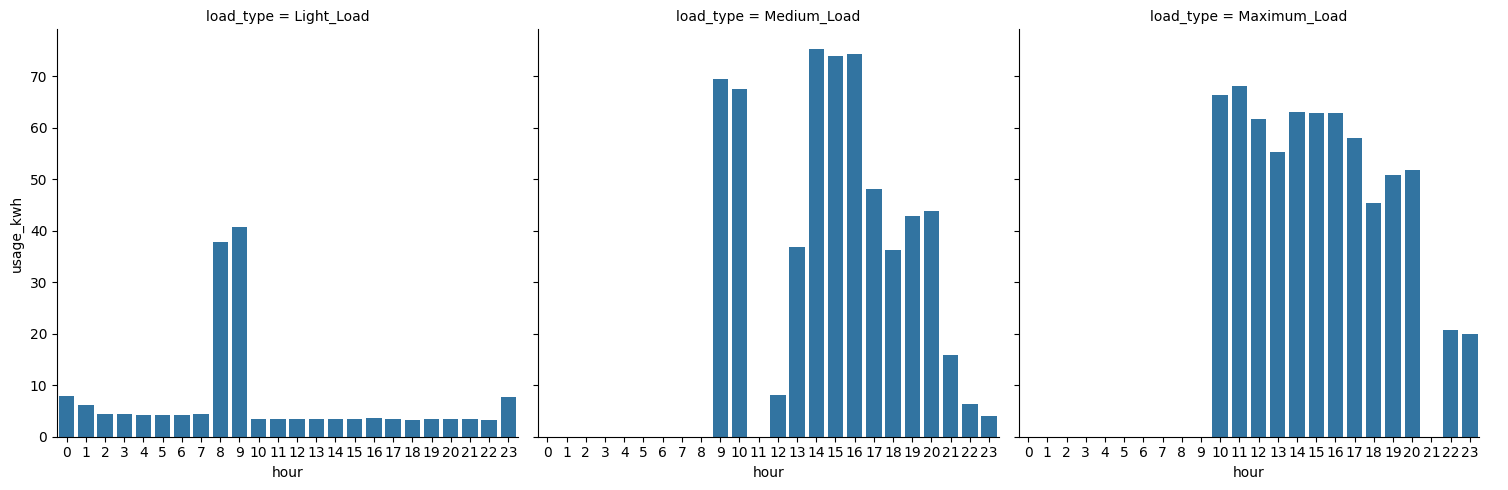

In [16]:
mean_hour_kwh=df.groupby(['hour','load_type'])['usage_kwh'].mean().reset_index()
sns.catplot(data=mean_hour_kwh, x='hour', y='usage_kwh', col='load_type', kind='bar')
plt.show()

In [17]:
# Checking on the relationship between the other power data vs the target usage kwh

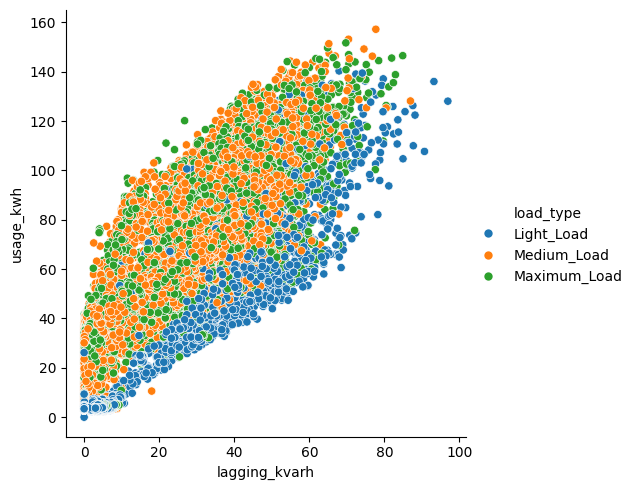

In [22]:
sns.relplot(data=df, x='lagging_kvarh', y='usage_kwh',kind='scatter',hue='load_type')
plt.show()

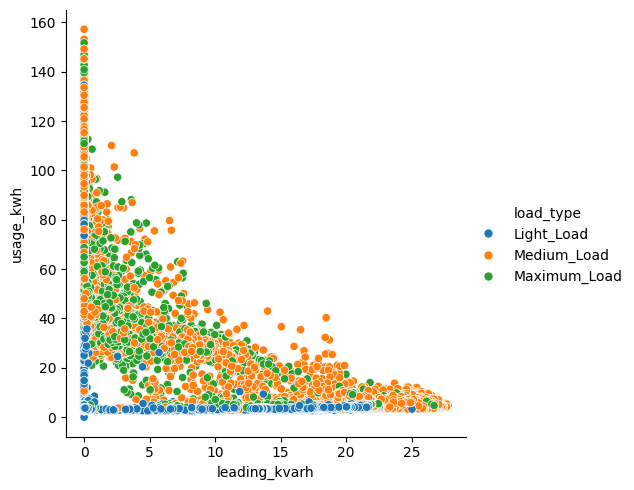

In [25]:
sns.relplot(data=df, x='leading_kvarh', y='usage_kwh',kind='scatter',hue='load_type')
plt.show()

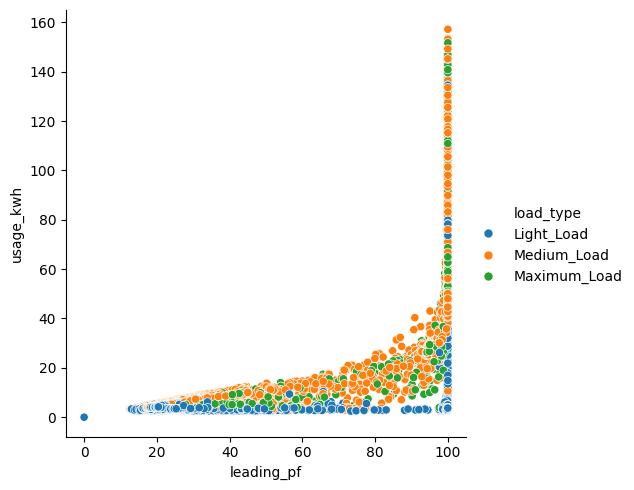

In [27]:
sns.relplot(data=df, x='leading_pf', y='usage_kwh',kind='scatter',hue='load_type')
plt.show()

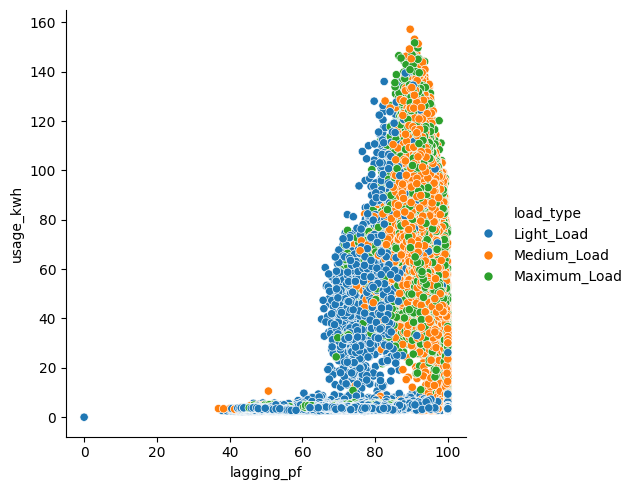

In [28]:
sns.relplot(data=df, x='lagging_pf', y='usage_kwh',kind='scatter',hue='load_type')
plt.show()

<Axes: xlabel='load_type', ylabel='nsm'>

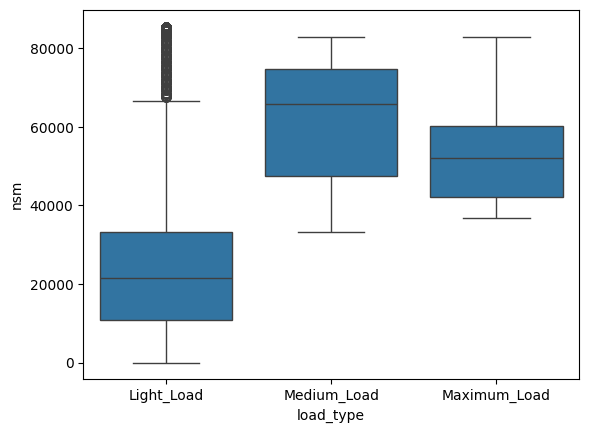

In [20]:
sns.boxplot(data=df, x='load_type', y='nsm')

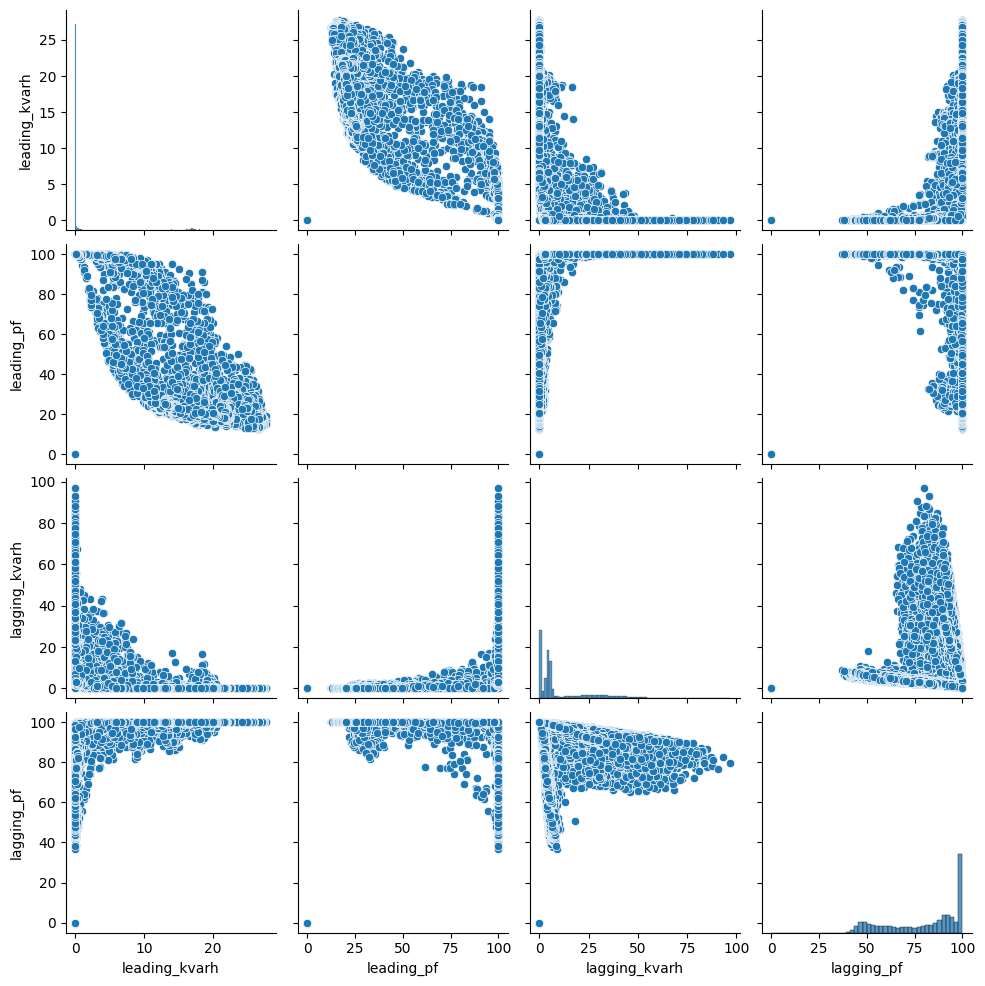

In [30]:
sns.pairplot(data=df, vars =['leading_kvarh','leading_pf','lagging_kvarh','lagging_pf'],kind='scatter',diag_kind='hist')
plt.show()

In [31]:
# Converting categorical columns as category
df['weekstatus']=df['weekstatus'].astype('category')
df['load_type']=df['load_type'].astype('category')
df['month']=df['month'].astype('category')
df['hour']=df['hour'].astype('category')

In [32]:
# Since month , day and hour is extracted , the date column was dropped
df = df.drop('date', axis=1)

In [33]:
# Sampling data for test.py
df.iloc[22222]

usage_kwh               54.83
lagging_kvarh            46.3
leading_kvarh             0.0
co2                      0.03
lagging_pf               76.4
leading_pf              100.0
nsm                     42300
weekstatus            Weekday
day                    Monday
load_type        Maximum_Load
month                       8
hour                       11
Name: 22222, dtype: object

In [34]:
df= pd.get_dummies(df, drop_first=True)
df.head()

,usage_kwh,lagging_kvarh,leading_kvarh,lagging_pf,leading_pf,nsm,co2_0.01,co2_0.02,co2_0.03,co2_0.04,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.17,2.95,0.0,73.21,100.0,900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.00,4.46,0.0,66.77,100.0,1800,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.24,3.28,0.0,70.28,100.0,2700,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.31,3.56,0.0,68.09,100.0,3600,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.82,4.50,0.0,64.72,100.0,4500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
X= df.drop('usage_kwh', axis=1)
y=df['usage_kwh']

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,random_state=42)
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [38]:
#Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_train_scaled)
rmse =root_mean_squared_error(y_pred, y_train)
r2 = lr.score(X_train_scaled, y_train)
print("RMSE :{:.2f}, R2:{:.4f}".format(rmse,r2))

RMSE :4.27, R2:0.9837


In [50]:
y_pred = lr.predict(X_test_scaled)
rmse =root_mean_squared_error(y_pred, y_test)
r2 = lr.score(X_test_scaled, y_test)
print("RMSE :{:.2f}, R2:{:.4f}".format(rmse,r2))

RMSE :3.83, R2:0.9869


In [51]:
with open('scaler.bin', 'wb') as f_out1:
    pickle.dump(scaler,f_out1)

In [52]:
with open('model.bin', 'wb') as f_out2:
    pickle.dump(lr,f_out2)